# Chern Numbers of (rational)fractionally filled 1d Charge Density Wave Insulators

Saumya Biswas (sbiswas4@umd.edu)

For more information about QuTiP see [http://qutip.org](http://qutip.org)

We introduce the basic functionality of QuTiPs Lattice1d class of the lattice module for calculating Chern numbers.

1d Charge Density Waves(CDW) are broken symmetry states with interesting topological properties. In a 1d lattice with CDW instability, the "translation-by-1-lattice-cell symmetry" is spontaneously broken and a periodic charge density with a wave-vector corresponding to the chage filling sets in. For rational filling(the period of the charge density being an integer multiple of the lattice constant), a Reduced Brillouin Zone(RBZ) can be defined with bands of the original Brillouin Zone folded into the reduced zone (ref [1]).

The modulus of the order parameter of the CDW is $|\Delta| = \langle c_i^{\dagger} c_i \rangle = A cos(2\pi n/N)$

CDWs can be made to 'slide' or move across the spatial dimension by continuously varying the complex phase($\phi$) of the order parameter $\bf{\Delta}=|\Delta|e^{i\phi}$. Changing $\phi$ by $2 \pi$ moves the order parameter back into itself. A two dimensional parameter space can be obtained for discrete values of wave-vector $\bf{k}$ and phase $\phi$. The Berry curvature in the 2d parameter space of $(\bf{k}, \phi)$ shows divergences indicating non-trivial topology.

In this notebook, we demonstrante the calculation of the Chern numbers in the gaps of a (p/q) filled Charge Density Waves for the (1/3) case i.e. p=1, q=3.

In [1]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
nkx = 100
nphi = 100
t = -1
Delta = 1
p = 1
q = 3
Q = 2*np.pi/q

In [3]:
dkx = 2*np.pi/q/nkx
dphi = 2*np.pi/nphi
kxs = np.arange(0, 2*np.pi/q+dkx, dkx)
phis = np.arange(0, 2*np.pi+dphi, dphi)

In [4]:
k1points = len(kxs); k2points = len(phis)
parameter_space = np.meshgrid(kxs, phis)

In [5]:
kxA = parameter_space[0]
phiA = parameter_space[1]        
vecs_ks=np.zeros((k1points,k2points,q,q),dtype=complex)

From ref [1], the k-space Hamiltonian for a $1/3$ filled CDW insulator is
\begin{eqnarray}
H_{k, \phi}= \begin{bmatrix}
    c_{k}^{\dagger} & c_{k+Q}^{\dagger} & c_{k+2Q}^{\dagger}       
\end{bmatrix} 
\begin{bmatrix}
      2t cos(k_xa)     & \Delta e^{i\phi} & \Delta e^{-i\phi} \\
\Delta e^{-i\phi} & 2t cos((k_x+Q)a) & \Delta e^{i\phi} \\
\Delta e^{i\phi} & \Delta e^{-i\phi} & 2t cos((k_x+2Q)a)
\end{bmatrix}
\begin{bmatrix}
    c_{k}  \\
    c_{k+Q} \\
    c_{k+2Q}
\end{bmatrix}
\end{eqnarray}

In [6]:
for ks in range(k1points):                # sweep over kx
    for kt in range(k2points):            # sweep over phi        
        kx = kxA[kt,ks];  phi = phiA[kt,ks];
        Odat = np.zeros( (3, 3),dtype=complex)

        Odat[0, 0] = 2 * t * np.cos(kx)
        Odat[1, 1] = 2 * t * np.cos(kx+ Q)
        Odat[2, 2] = 2 * t * np.cos(kx+ 2*Q)

        Odat[0, 1] = Delta * np.exp(phi *1j)
        Odat[0, 2] = Delta * np.cos(-phi *1j)
        Odat[1, 2] = Delta * np.cos(phi *1j)
                
        Odat[1, 0] = Delta * np.exp(-phi *1j)
        Odat[2, 0] = Delta * np.exp(phi *1j)
        Odat[2, 1] = Delta * np.exp(-phi *1j)

        (vals, vecs)=np.linalg.eigh(Odat)
        vecs=vecs.T        
        vecs_ks[ks,kt,:,:] = vecs[:,:]

In [7]:
np.shape(vecs_ks)

(101, 101, 3, 3)

In [8]:
max_occ = 1
occ_bnds = np.zeros((k1points,k2points,max_occ,3),dtype=complex)
for i in range(max_occ):
    occ_bnds[:,:,i,:] = vecs_ks[:,:,i,:]

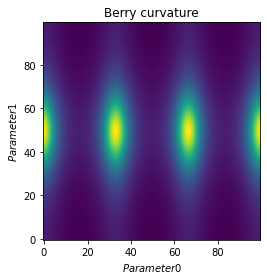

In [9]:
plot_berry_curvature(occ_bnds)

In [10]:
b_curv = berry_curvature(occ_bnds)
# The numerical integration amounts to summing up the discretized Berry curvature.
print('The Chern number is:')
print(b_curv.sum()/2/np.pi )

The Chern number is:
1.0000000000000004


Therefore, the Chern number in the bandgap above the lowest band is 1.

In [11]:
max_occ = 2
occ_bnds = np.zeros((k1points,k2points,max_occ,3),dtype=complex)
for i in range(max_occ):
    occ_bnds[:,:,i,:] = vecs_ks[:,:,i,:]
b_curv = berry_curvature(occ_bnds)
# The numerical integration amounts to summing up the discretized Berry curvature.
print('The Chern number is:')
print(b_curv.sum()/2/np.pi )

The Chern number is:
-1.0000000000000002


In [12]:
max_occ = 3
occ_bnds = np.zeros((k1points,k2points,max_occ,3),dtype=complex)
for i in range(max_occ):
    occ_bnds[:,:,i,:] = vecs_ks[:,:,i,:]
b_curv = berry_curvature(occ_bnds)
# The numerical integration amounts to summing up the discretized Berry curvature.
print('The Chern number is:')
print(b_curv.sum()/2/np.pi )

The Chern number is:
-2.0403523087557085e-16


After, subsequent calculation of the Chern number in the gaps over the middle band and the topmost band, we
can conclude thee Chern numbers in the three gaps are ${1, -2, 1}$ respectively.

### References
[1] Flicker, Felix. The Geometry and Topology of Change-ordered Quantum Fields in Low-dimensional Systems. Diss. University of Bristol, 2015.
http://www.felixflicker.com/pdf/papers/FLICKER_PhD_Thesis.pdf

In [76]:
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Original developers: R. J. Johansson & P. D. Nation.
Current admin team: Alexander Pitchford, Paul D. Nation, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, and Eric Giguère.
Project Manager: Franco Nori.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.5.0.dev0+c8074e5
Numpy Version:      1.15.2
Scipy Version:      1.1.0
Cython Version:     0.28.5
Matplotlib Version: 3.0.0
Python Version:     3.5.4
Number of CPUs:     2
BLAS Info:          INTEL MKL
OPENMP Installed:   True
INTEL MKL Ext:      True
Platform Info:      Linux (x86_64)
Installation path:  /home/ssaumya7/Desktop/GSOC/Aug5/qutip/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qutip.cite()`


In [77]:
qutip.cite()

@article{qutip2,
doi = {10.1016/j.cpc.2012.11.019},
url = {https://doi.org/10.1016/j.cpc.2012.11.019},
year  = {2013},
month = {apr},
publisher = {Elsevier {BV}},
volume = {184},
number = {4},
pages = {1234--1240},
author = {J.R. Johansson and P.D. Nation and F. Nori},
title = {{QuTiP} 2: A {P}ython framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
@article{qutip1,
doi = {10.1016/j.cpc.2012.02.021},
url = {https://doi.org/10.1016/j.cpc.2012.02.021},
year  = {2012},
month = {aug},
publisher = {Elsevier {BV}},
volume = {183},
number = {8},
pages = {1760--1772},
author = {J.R. Johansson and P.D. Nation and F. Nori},
title = {{QuTiP}: An open-source {P}ython framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
